 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
 #Import the data by reading the CSV file into data frame and setting the DatetimeIndex . Reading whale returns
# Review the first 5 rows of the DataFrame

whales_return_df = pd.read_csv(
    Path("./Resources/whale_returns.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)

whales_return_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
#Checking For Null Values in dataset 
whales_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [71]:
whales_return_df.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [3]:
# Drop nulls
#Drop null values and save the dataframe with no null values 
whales_return_df=whales_return_df.dropna()
whales_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [4]:
# Reading algorithmic returns
#Read the csv file into dataframe and set date as index and date format 
algo_return_df = pd.read_csv(
    Path("./Resources/algo_returns.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)

algo_return_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [5]:
# Count nulls
#Check data for null values file doesnt have null values 
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [6]:
# Drop nulls
algo_return_df =algo_return_df.dropna()
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [7]:
# Reading S&P TSX 60 Closing Prices
#Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data.

sp_return_df = pd.read_csv(
    Path("./Resources/sp_tsx_history.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)

sp_return_df.head()


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [8]:
# Fix Data Type:
#using lambda expression to remove '$' and ',' from the string in order to convert the Close cloumn to float 
sp_return_df['Close']=sp_return_df['Close'].apply(lambda x:str(x).replace('$','')if '$' in str(x) else str(x))
sp_return_df['Close']=sp_return_df['Close'].apply(lambda x:str(x).replace(',','')if ',' in str(x) else str(x))

In [9]:
#change the cloumn Close type to float to apply returns calculations 
sp_return_df['Close']= (sp_return_df['Close']).astype(float)

In [10]:
#drop null values and save the dataframe with no null values 
sp_return_df=sp_return_df.dropna()

In [11]:
# Drop nulls
#data has 0 null values
sp_return_df.isnull().sum()

Close    0
dtype: int64

In [12]:
#Rename Close cloumn to match what whale proftoflio names look like 
sp_return_df=sp_return_df.rename(columns={'Close': 'S&P TSX60'})

In [13]:
## Calculate the daily return using the 'pct_change()' function
sp_return_df = sp_return_df.pct_change()
sp_return_df.head()

,S&P TSX60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
returns_all_df_con = pd.concat([whales_return_df,algo_return_df,sp_return_df], axis=1, join='inner')

In [15]:
returns_all_df_con.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date', ylabel='Daily Return'>

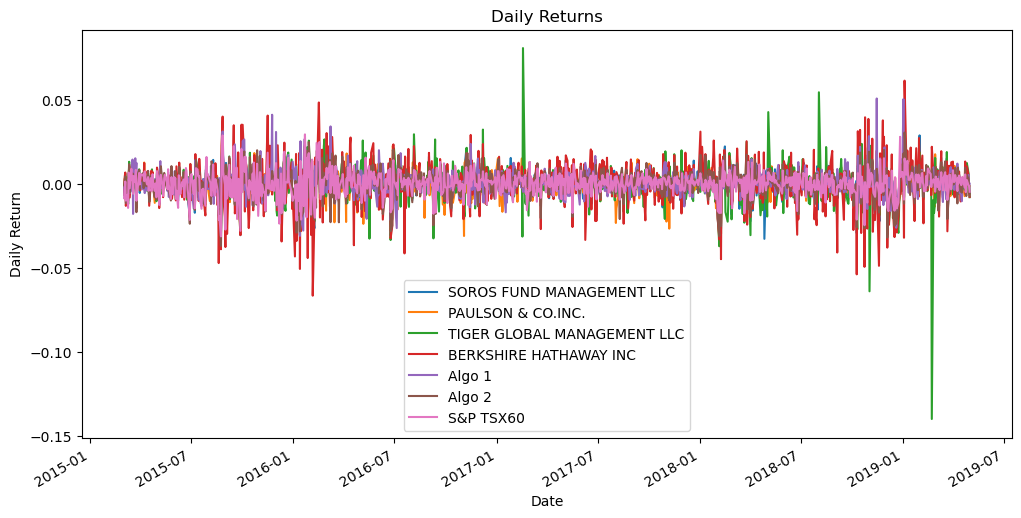

In [19]:
# Plot daily returns of all portfolios
returns_all_df_con.plot(figsize=(12, 6), title='Daily Returns', xlabel='Date', ylabel='Daily Return')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Return'}, xlabel='Date', ylabel='Cumulative Return'>

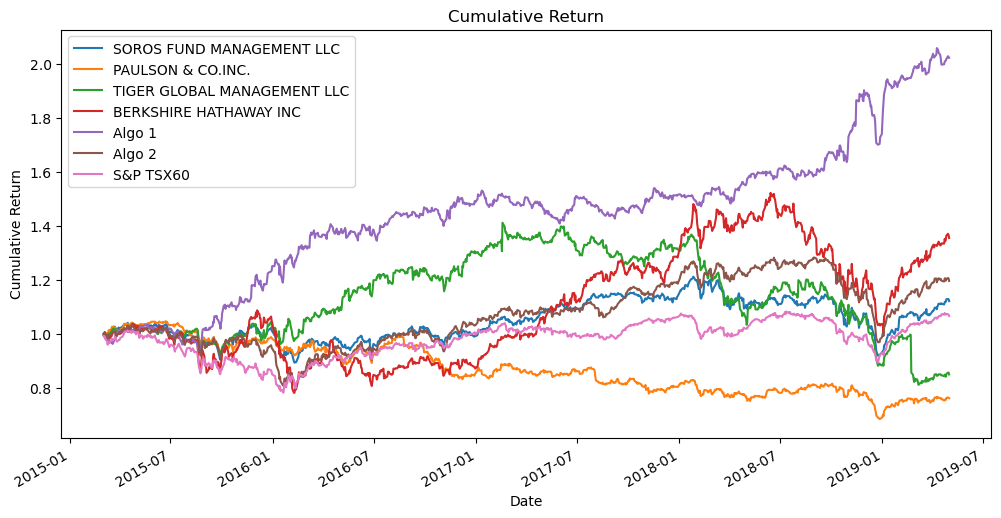

In [14]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + returns_all_df_con).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 6), title='Cumulative Return', xlabel='Date', ylabel='Cumulative Return')

In [48]:
#sort the portfolio in aplhaptic order 
returns_all_df_con=returns_all_df_con.reindex(sorted(returns_all_df_con.columns), axis=1)

In [49]:
returns_all_df_con.head()

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P TSX60,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.006569,-0.004981,-0.008530,-0.001266,-0.000496
2015-03-04,-0.008589,0.002416,0.004213,0.003241,-0.003371,0.002230,-0.002534
2015-03-05,-0.000955,0.004323,0.006726,0.004076,0.001344,0.004016,0.002355
2015-03-06,-0.004957,-0.011460,-0.013098,-0.003574,-0.009972,-0.007905,-0.008481
2015-03-09,-0.005447,0.001303,-0.001652,0.004225,-0.006555,0.000582,0.005843


In [53]:
returns_all_df_con.sort_index(inplace=True, ascending=False)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

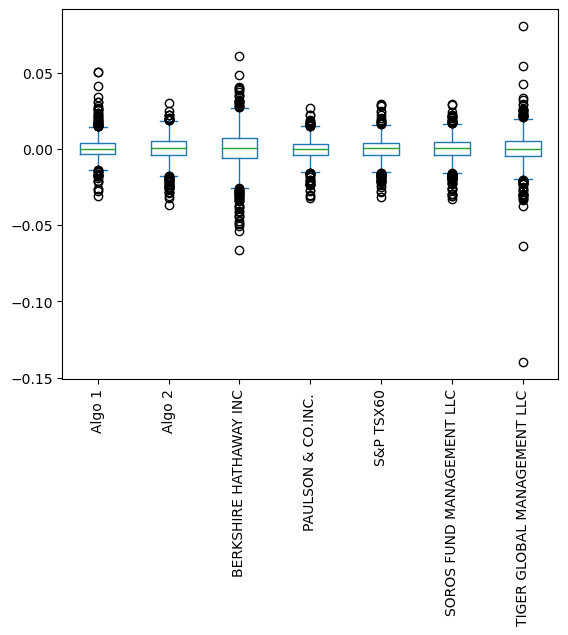

In [76]:
# Box plot to visually show risk
returns_all_df_con.plot.box(rot = 90)


### Calculate Standard Deviations

In [77]:
# Calculate the daily standard deviations of all portfolios
## Daily Standard Deviations
daily_std = returns_all_df_con.std()
daily_std.head()

Algo 1                    0.007589
Algo 2                    0.008326
BERKSHIRE HATHAWAY INC    0.012826
PAULSON & CO.INC.         0.006982
S&P TSX60                 0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [28]:
# Calculate  the daily standard deviation of S&P TSX 60
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = daily_std['S&P TSX60']




In [29]:
sp_tsx_std

0.007034167748577725

In [30]:
## Determine which portfolios are riskier than the S&P TSX 60
risk_lst=[]
total =daily_std.sum()
for x , val in  daily_std.items():
    if val > sp_tsx_std:
        percentage= (val/total) *100
        risk_lst.append((x , percentage))
        print((f'{x} is {percentage:.2f}% Higher risk Than S&P TSX 60  '))
else:
    print((f'{x} is {percentage:.2f} % Less Risk Than S&P TSX 60'))

Algo 1 is 12.35% Higher risk Than S&P TSX 60  
Algo 2 is 13.55% Higher risk Than S&P TSX 60  
BERKSHIRE HATHAWAY INC is 20.87% Higher risk Than S&P TSX 60  
SOROS FUND MANAGEMENT LLC is 12.73% Higher risk Than S&P TSX 60  
TIGER GLOBAL MANAGEMENT LLC is 17.70% Higher risk Than S&P TSX 60  
TIGER GLOBAL MANAGEMENT LLC is 17.70 % Less Risk Than S&P TSX 60


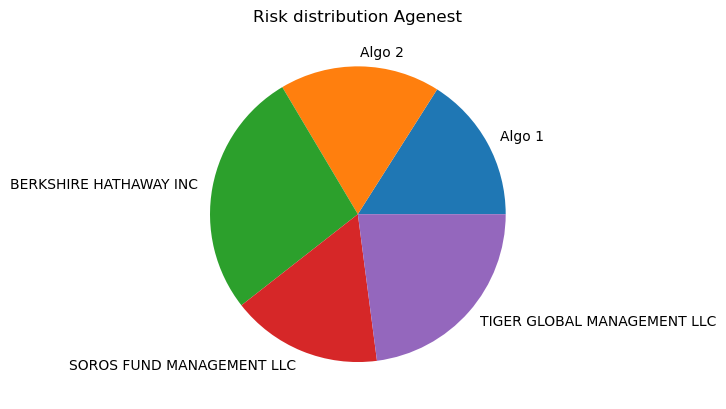

In [31]:
#Pie chart to show how risk is distributed aginest S&P TSX 60
labels = [item[0] for item in risk_lst]
values = [item[1] for item in risk_lst]

plt.pie(values, labels=labels)
plt.title('Risk distribution Agenest')
plt.show()


### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

Algo 1                    0.120470
Algo 2                    0.132177
BERKSHIRE HATHAWAY INC    0.203599
PAULSON & CO.INC.         0.110841
S&P TSX60                 0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling standard deviation for all portfolios using a 21-day window'}, xlabel='Date', ylabel='Return'>

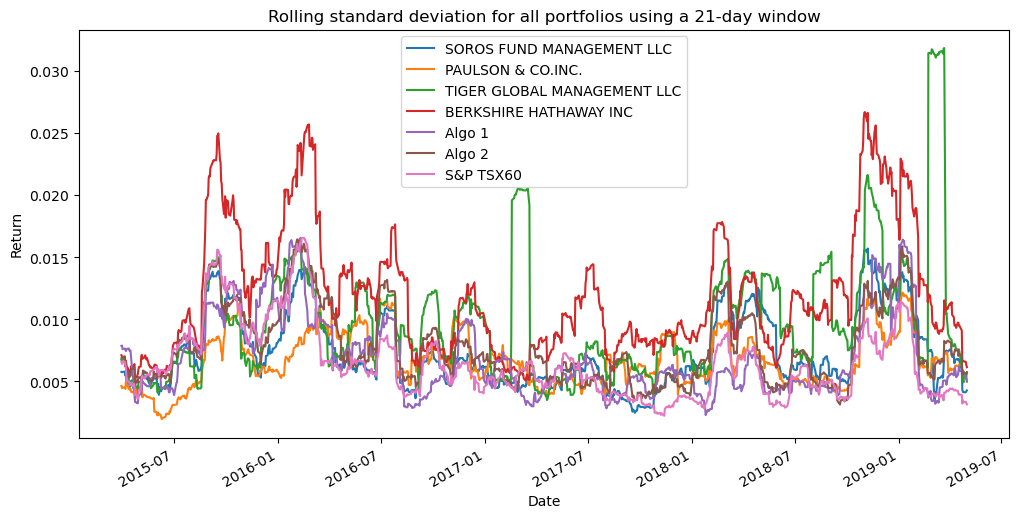

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_all_21=returns_all_df_con.rolling(window=21).std()
rolling_all_21

# Plot the rolling standard deviation
rolling_all_21.plot(figsize=(12, 6), title='Rolling standard deviation for all portfolios using a 21-day window', xlabel='Date', ylabel='Return')

### Calculate and plot the correlation

<AxesSubplot:>

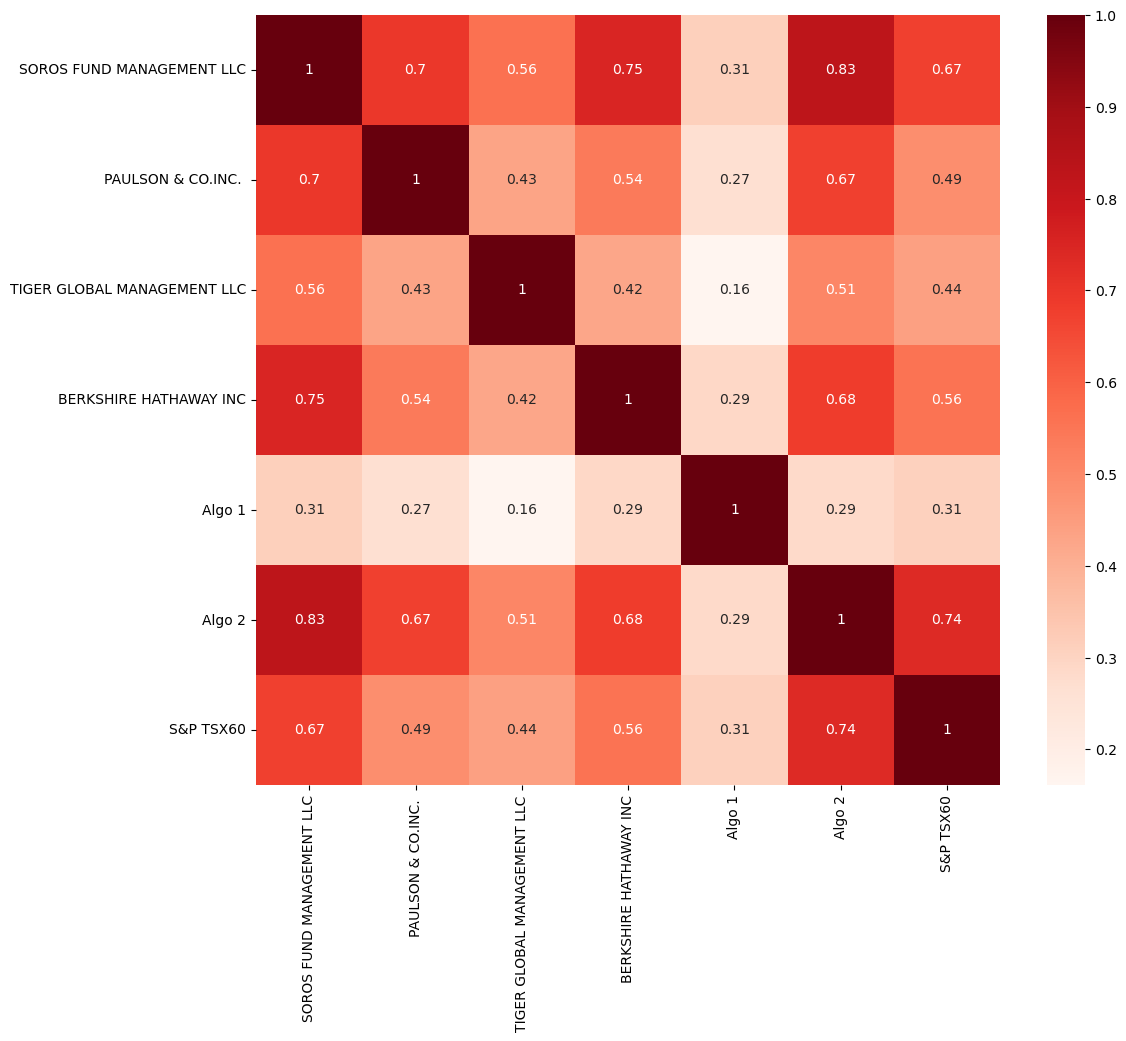

In [21]:
# Calculate the correlation
returns_all_df_corr=returns_all_df_con.corr()


# Display de correlation matrix
#from the heatmap above algo 2  and s&p are postivelley corrlated 0.74
plt.figure(figsize=(12,10))
sns.heatmap(returns_all_df_corr, annot=True, cmap=plt.cm.Reds)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [116]:
# Calculate covariance of a single portfolio
berkshire_covariance =returns_all_df_con['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(returns_all_df_con['S&P TSX60'])
berkshire_covariance

# Calculate variance of S&P TSX
#calculate variance for S&PTS portfolio
s_and_p_variance =returns_all_df_con['S&P TSX60'].rolling(window=60).var()
s_and_p_variance

# Computing beta
s_and_p_beta  = berkshire_covariance  / s_and_p_variance
s_and_p_beta



Date
2019-05-01         NaN
2019-04-30         NaN
2019-04-29         NaN
2019-04-26         NaN
2019-04-25         NaN
                ...   
2015-03-09    0.688642
2015-03-06    0.725961
2015-03-05    0.730892
2015-03-04    0.720473
2015-03-03    0.719495
Length: 1029, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Covariance BERKSHIRE HATHAWAY INC Returns vs. S&P TSX60 Returns'}, xlabel='Date'>

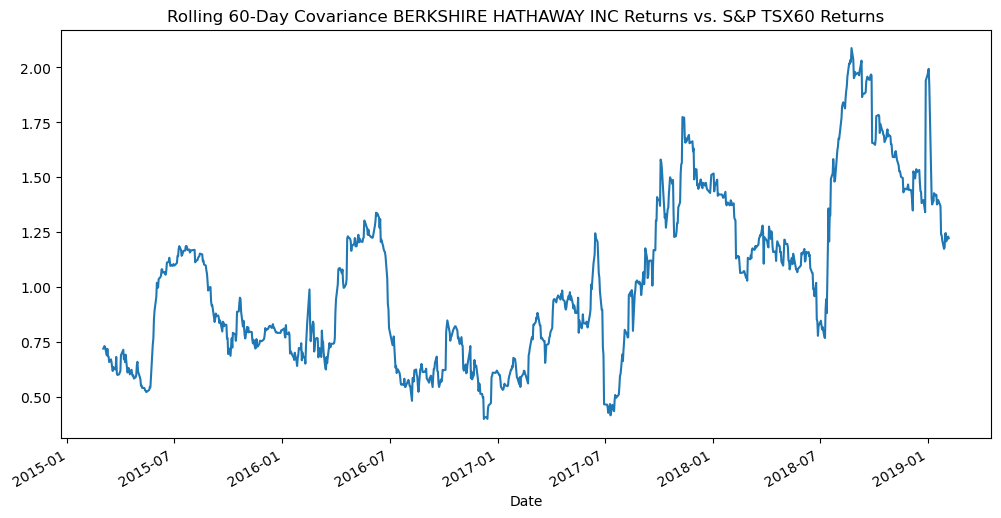

In [119]:
# Plot beta trend

s_and_p_beta.plot(figsize=(12, 6), title='Rolling 60-Day Beta BERKSHIRE HATHAWAY INC Returns vs. S&P TSX60 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
algo1_std_ewm = returns_all_df_con['Algo 1'].ewm(halflife=21).std()
algo2_std_ewm = returns_all_df_con['Algo 2'].ewm(halflife=21).std()
brekshire_std_ewm = returns_all_df_con['BERKSHIRE HATHAWAY INC'].ewm(halflife=21).std()
paul_std_ewm= returns_all_df_con['PAULSON & CO.INC. '].ewm(halflife=21).std()
spx_std_ewm = returns_all_df_con['S&P TSX60'].ewm(halflife=21).std()
soros_std_ewm = returns_all_df_con['SOROS FUND MANAGEMENT LLC'].ewm(halflife=21).std()
tigier_std_ewm = returns_all_df_con['TIGER GLOBAL MANAGEMENT LLC'].ewm(halflife=21).std()



Text(0.5, 1.0, 'Exponentially Weighted Moving Average with 21-Day Half-Life and Standard Deviation')

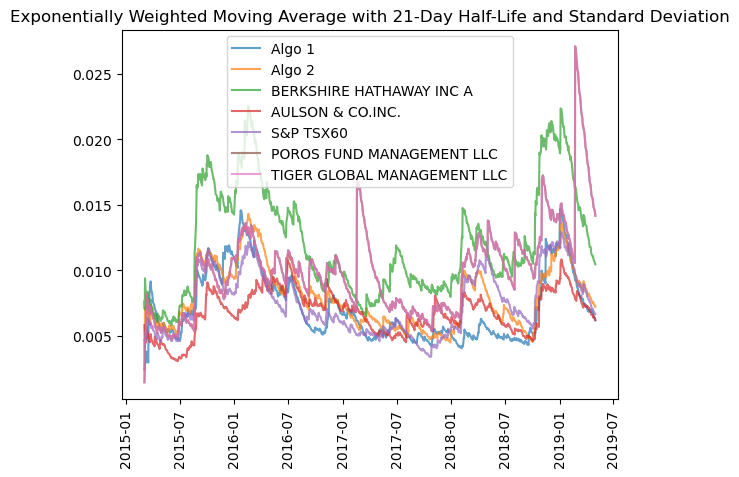

In [138]:
#plot  the moving average of 21 days life time for all portfolios 
plt.plot(algo1_std_ewm, label='Algo 1',alpha=0.7)
plt.plot(algo2_std_ewm, label='Algo 2',alpha=0.7)
plt.plot(brekshire_std_ewm, label='BERKSHIRE HATHAWAY INC A',alpha=0.7)
plt.plot(paul_std_ewm, label='AULSON & CO.INC.',alpha=0.7)
plt.plot(soros_std_ewm, label='S&P TSX60',alpha=0.7)
plt.plot(tigier_std_ewm, label='POROS FUND MANAGEMENT LLC',alpha=0.7)
plt.plot(tigier_std_ewm, label='TIGER GLOBAL MANAGEMENT LLC',alpha=0.7)
plt.xticks(rotation=90)
plt.legend()
plt.title('Exponentially Weighted Moving Average with 21-Day Half-Life and Standard Deviation')



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
return_all_sharpe=returns_all_df_con.copy()

In [151]:
# Visualize the sharpe ratios as a bar plot
#as rate free  risk not provided  will use 0
return_all_sharpe=((returns_all_df_con.mean() -  0) * 252 )/ (returns_all_df_con.std() * np.sqrt(252))


In [148]:
return_all_sharpe

Algo 1                         1.491514
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
PAULSON & CO.INC.             -0.547594
S&P TSX60                      0.195550
SOROS FUND MANAGEMENT LLC      0.286709
TIGER GLOBAL MANAGEMENT LLC   -0.144455
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

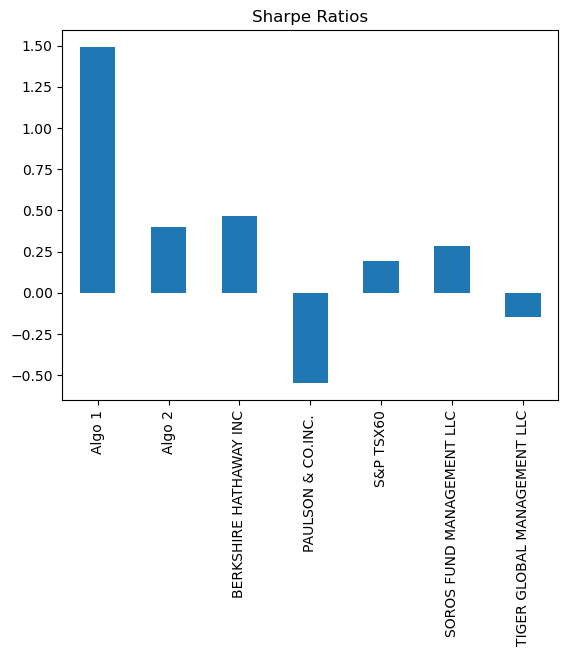

In [150]:
#plot sharpe ratio for all portifolio
return_all_sharpe.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

according to the sharpe metric preformace both algo 1 and berkshire preformend S&P the market  

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stoc
tesla_df = pd.read_csv(
    Path("./Resources/TSLA.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)

tesla_df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500.0,Tsla
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500.0,Tsla
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000.0,Tsla
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000.0,Tsla
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500.0,Tsla


In [30]:
#drop cloumns unwated 
tesla_df.drop(columns=['Open','High','Low','Volume','Adj Close'], inplace=True)

In [31]:
#selected dates from data set  that match the other stock starting date 
tesla_df=tesla_df.loc['2018-01-02':'2019-01-02']


In [32]:
# Reading data from 2nd stock

shop_df = pd.read_csv(
    Path("./Resources/shop_historical.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [33]:
# Reading data from 3rd stock
otex_df = pd.read_csv(
    Path("./Resources/otex_historical.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [36]:
# Combine all stocks in a single DataFrame
customized_portfolio_df = pd.concat([tesla_df,otex_df,shop_df], axis=1 , join ='inner')

In [37]:
# Orgazied data by Symbol column
## Reset Date index
customized_portfolio_df = pd.concat([tesla_df,otex_df, shop_df], axis="rows", join="inner")
customized_portfolio_df = customized_portfolio_df.reset_index()
customized_portfolio_df = customized_portfolio_df.pivot_table(values="Close", index="Date", columns="Symbol")
customized_portfolio_df.head()

Symbol,OTEX,SHOP,Tsla
Date,,,
2018-01-02,43.58,132.06,64.106003
2018-01-03,43.07,135.15,63.450001
2018-01-04,42.91,137.46,62.924000
2018-01-05,42.57,137.26,63.316002
2018-01-08,42.16,139.51,67.281998


In [105]:
# Calculate daily returns
customized_portfolio_return=customized_portfolio_df.pct_change()
# Drop NA
customized_portfolio_return.isnull().sum()
customized_portfolio_return=customized_portfolio_return.dropna()
# Display sample data
customized_portfolio_return.isnull().sum()



Symbol
OTEX    0
SHOP    0
Tsla    0
dtype: int64

In [102]:
# Drop NA
customized_portfolio_return.isnull().sum()
customized_portfolio_return=customized_portfolio_df.dropna()
# Display sample data
customized_portfolio_return.isnull().sum()

Symbol
OTEX    0
SHOP    0
Tsla    0
dtype: int64

In [39]:
customized_portfolio_return.isnull().sum()

Symbol
OTEX    0
SHOP    0
Tsla    0
dtype: int64

In [98]:
# Sort datetime index in ascending order (past to present)
customized_portfolio_return.sort_index(inplace=True)

In [106]:
customized_portfolio_return.head()

Symbol,OTEX,SHOP,Tsla
Date,,,
2018-01-03,-0.011703,0.023398,-0.010233
2018-01-04,-0.003715,0.017092,-0.008290
2018-01-05,-0.007924,-0.001455,0.006230
2018-01-08,-0.009631,0.016392,0.062638
2018-01-09,-0.000712,-0.011254,-0.008085


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [108]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

returns_weight_df=customized_portfolio_return.dot(weights)

In [109]:
returns_weight_df.head()

Date
2018-01-03    0.000488
2018-01-04    0.001696
2018-01-05   -0.001050
2018-01-08    0.023133
2018-01-09   -0.006684
dtype: float64

<AxesSubplot:xlabel='Date'>

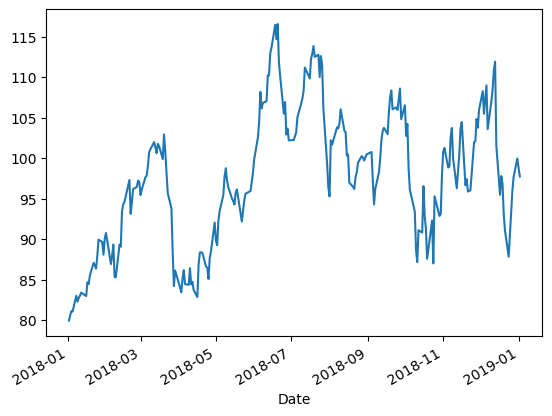

In [41]:
# Display sample data
returns_weight_df.head()
returns_weight_df.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [110]:
# Join your returns DataFrame to the original returns DataFrame
all_portifolios= pd.concat([returns_all_df_con,returns_weight_df],axis=1,join='inner')

In [112]:
all_portifolios.rename(columns={0:'Custom'},inplace=True)

In [113]:
all_portifolios.head()

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P TSX60,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,Custom
Date,,,,,,,,
2019-05-01,0.000094,-0.007358,-0.007833,-0.001341,-0.004703,-0.005847,-0.007936,0.006473
2019-04-30,-0.002944,-0.001570,-0.003702,-0.002211,-0.001183,-0.001295,-0.000259,0.025304
2019-04-29,0.005208,0.002829,0.005223,0.002719,-0.000788,0.001254,0.006251,0.002331
2019-04-26,0.002981,0.005256,0.010434,0.009162,0.002254,0.008149,0.012355,0.004467
2019-04-25,0.000682,-0.007247,0.004848,-0.001291,-0.000628,-0.000285,-0.005153,0.000995


In [125]:
# Only compare dates where return data exists for all the stocks (drop NaNs) 
all_portifolios=all_portifolios.dropna()
#mutual_dates = returns_all_df_con.index.intersection(returns_weight_df.index)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [126]:
# Calculate the annualized `std`
returns_annulaized_std= all_portifolios.std() * np.sqrt(252)

In [127]:
returns_annulaized_std

Algo 1                         0.120028
Algo 2                         0.137664
BERKSHIRE HATHAWAY INC         0.227445
PAULSON & CO.INC.              0.114343
S&P TSX60                      0.099121
SOROS FUND MANAGEMENT LLC      0.145675
TIGER GLOBAL MANAGEMENT LLC    0.219833
Custom                         0.296453
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [128]:
# Calculate rolling standard deviation
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
rolling_all_21_all_port=all_portifolios.rolling(window=21).std()
# Plot rolling standard deviation


<AxesSubplot:xlabel='Date'>

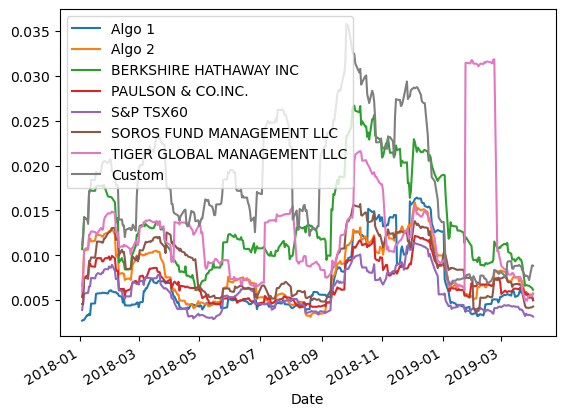

In [146]:
rolling_all_21_all_port.plot()

### Calculate and plot the correlation

<AxesSubplot:>

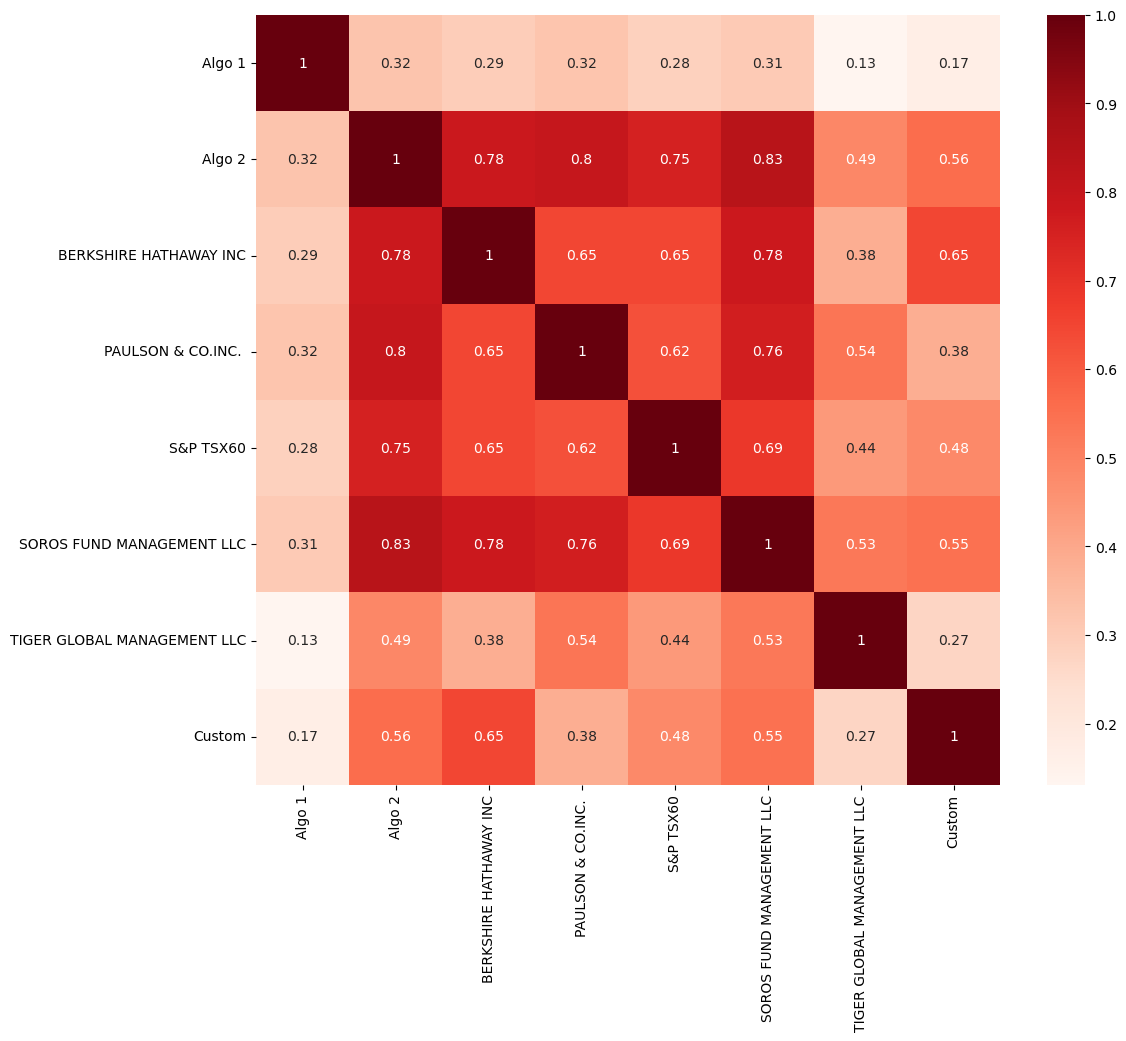

In [131]:
# Calculate and plot the correlation
customized_portfolio_returns=all_portifolios.corr()
plt.figure(figsize=(12,10))
sns.heatmap(customized_portfolio_returns, annot=True, cmap=plt.cm.Reds)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling beta for Custom  portfolio using a 60-day window'}, xlabel='Date', ylabel='Return'>

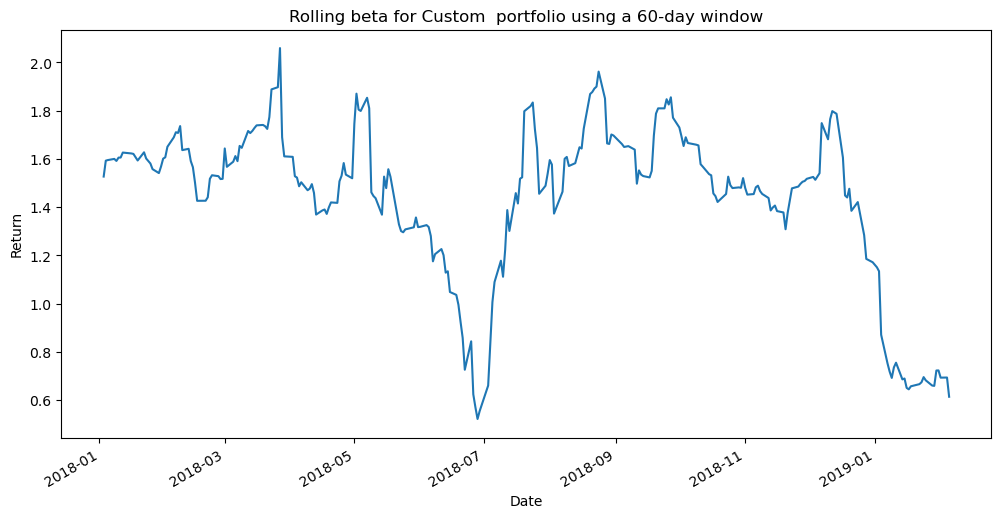

In [132]:
# Calculate and plot Beta
custom_covariance =all_portifolios['Custom'].rolling(window=60).cov(all_portifolios['S&P TSX60'])
custom_covariance

# Calculate variance of S&P TSX
#calculate variance for S&PTS portfolio
s_and_p_60_variance =all_portifolios['S&P TSX60'].rolling(window=60).var()
s_and_p_60_variance

# Computing beta
custom_beta  = custom_covariance  / s_and_p_60_variance
custom_beta
custom_beta.plot(figsize=(12, 6), title='Rolling beta for Custom  portfolio using a 60-day window', xlabel='Date', ylabel='Return')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [133]:
# Calculate Annualized Sharpe Ratios
#as rate free  risk not provided  will use 0
custmoize_sharpe=((all_portifolios.mean() -  0) * 252) / (all_portifolios.std() * np.sqrt(252))

In [152]:
custmoize_sharpe

Algo 1                         1.901461
Algo 2                         0.021394
BERKSHIRE HATHAWAY INC         0.195907
PAULSON & CO.INC.             -0.396282
S&P TSX60                      0.034651
SOROS FUND MANAGEMENT LLC     -0.088196
TIGER GLOBAL MANAGEMENT LLC   -1.391612
Custom                         1.163207
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

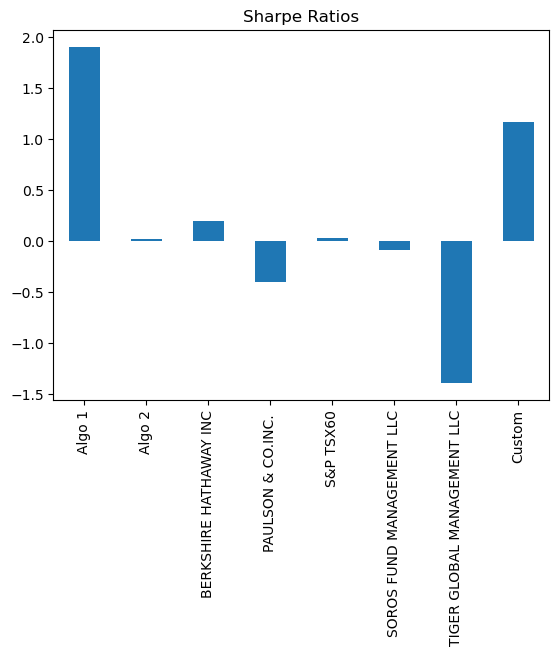

In [134]:
# Visualize the sharpe ratios as a bar plot
custmoize_sharpe.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
custom portfolio preformed the market which was have second higher shapre ratio and indicates high returns with hig